In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

## Load dataset:

In [14]:
train_data = pd.read_csv("dataset/train.csv", dtype='float32')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
x = train_data.iloc[:,1:].to_numpy()

In [25]:
x /= 255.0
x = x.reshape(x.shape[0], 28, 28)

In [80]:
y = train_data['label'].to_numpy(dtype='int')

In [81]:
print(x.shape)
print(y.shape)

(42000, 28, 28)
(42000,)


## HOG feature extraction:

In [52]:
# Hog params:
orientations = 6
pixels_per_cell = (4,4)
cells_per_block = (2,2)

In [69]:
features, hog_image = hog(x[1,:,:], orientations, pixels_per_cell, cells_per_block, visualize=True)

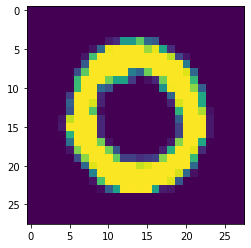

In [70]:
plt.imshow(x[1,:,:])

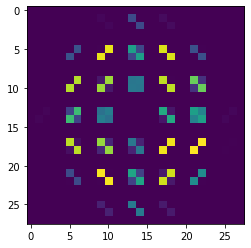

In [71]:
plt.imshow(hog_image)

In [65]:
print(features.shape)

(864,)


In [72]:
hog_features = np.zeros((42000,864))
for i in range(x.shape[0]):
    features = hog(x[i,:,:], orientations, pixels_per_cell, cells_per_block)
    hog_features[i,:] = features

In [73]:
print(hog_features.shape)

(42000, 864)


## Prepare data for training:

In [83]:
x_train, x_test, y_train, y_test = train_test_split(hog_features, y, test_size=0.20, shuffle=False)

## Train on SVM:

In [76]:
clf = svm.SVC(tol=0.01, verbose=True)

In [84]:
clf.fit(x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.01,
    verbose=True)

In [85]:
y_train_pred = clf.predict(x_train)
print("Accuracy: "+str(accuracy_score(y_train, y_train_pred)))

Accuracy: 0.9965178571428571


In [86]:
y_test_pred = clf.predict(x_test)
print("Accuracy: "+str(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.9877380952380952
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       0.99      0.99      0.99       950
           2       0.98      0.99      0.99       801
           3       0.99      0.98      0.98       882
           4       0.99      0.99      0.99       811
           5       0.99      0.98      0.99       747
           6       1.00      1.00      1.00       831
           7       0.99      0.99      0.99       884
           8       0.98      0.98      0.98       802
           9       0.98      0.97      0.98       840

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



## without HOG feature:

In [87]:
x = train_data.iloc[:,1:].to_numpy() / 255.0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [88]:
clf = svm.SVC(tol=0.01)

In [89]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.01,
    verbose=False)

In [90]:
y_test_pred = clf.predict(x_test)
print("Accuracy: "+str(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.9772619047619048
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       852
           1       0.98      0.99      0.99       950
           2       0.98      0.98      0.98       801
           3       0.98      0.97      0.97       882
           4       0.98      0.97      0.97       811
           5       0.98      0.96      0.97       747
           6       0.98      0.99      0.98       831
           7       0.99      0.98      0.99       884
           8       0.97      0.98      0.97       802
           9       0.97      0.95      0.96       840

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



So hog feature descriptor do improve the performance by a reasonable factor